# EDA + LGBM + EVAL

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error ,r2_score , explained_variance_score


In [2]:
train= pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

In [3]:
train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [5]:
test.shape

(125690, 12)

In [6]:
train.shape

(188533, 13)

In [7]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


# Exploratory Data Analysis

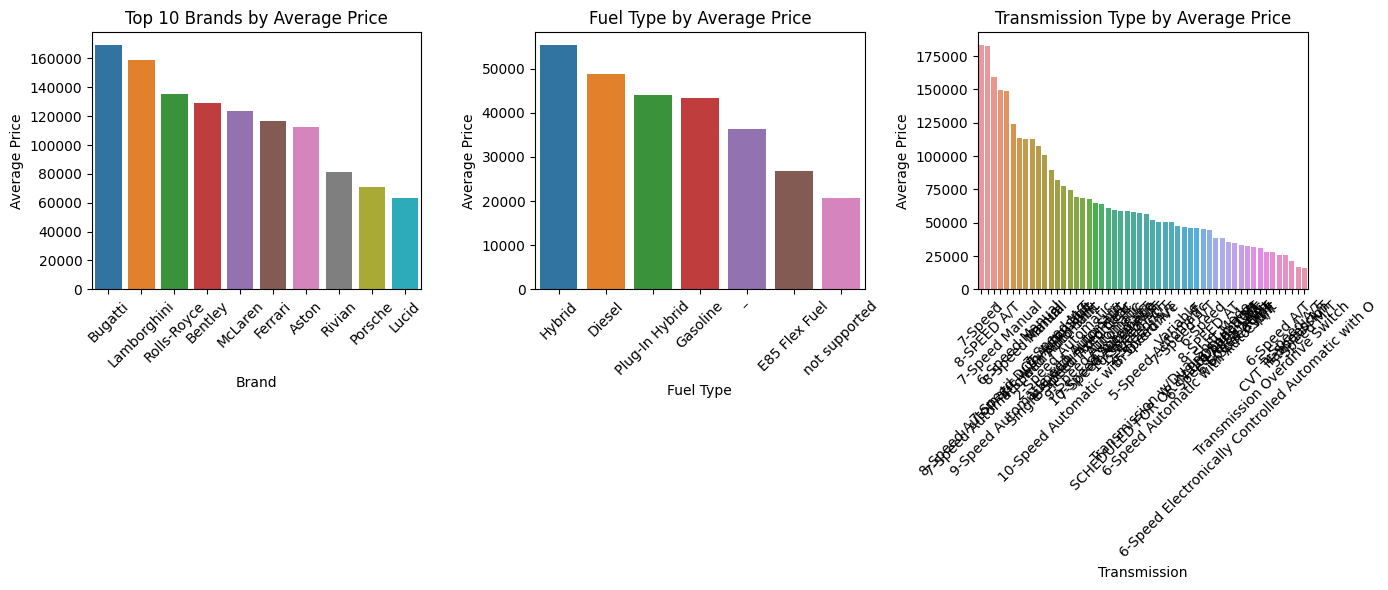

In [8]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
avg_price_by_brand = train.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)  # Top 10 brands by average price
sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values)
plt.title('Top 10 Brands by Average Price')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Average Price')

plt.subplot(1, 3, 2)
avg_price_by_fuel = train.groupby('fuel_type')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_fuel.index, y=avg_price_by_fuel.values)
plt.title('Fuel Type by Average Price')
plt.xticks(rotation=45)
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')

plt.subplot(1, 3, 3)
avg_price_by_transmission = train.groupby('transmission')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_transmission.index, y=avg_price_by_transmission.values)
plt.title('Transmission Type by Average Price')
plt.xticks(rotation=45)
plt.xlabel('Transmission')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

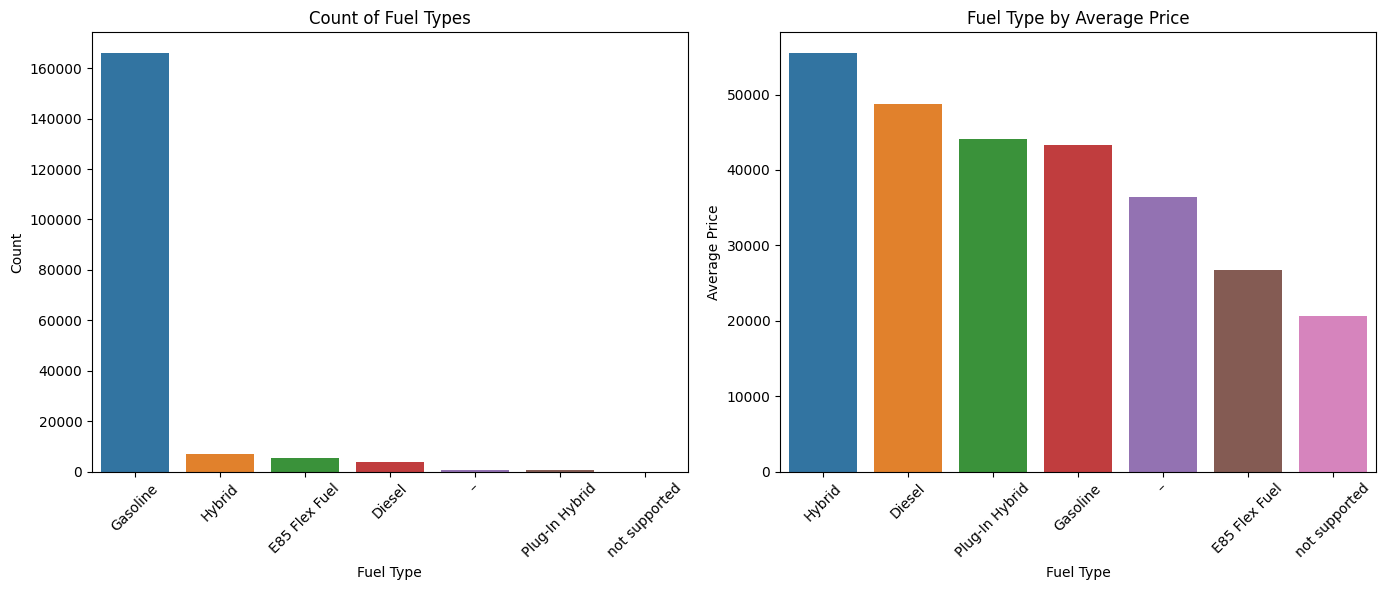

In [9]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='fuel_type', data=train, order=train['fuel_type'].value_counts().index)
plt.title('Count of Fuel Types')
plt.xticks(rotation=45)
plt.xlabel('Fuel Type')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
avg_price_by_fuel = train.groupby('fuel_type')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_fuel.index, y=avg_price_by_fuel.values)
plt.title('Fuel Type by Average Price')
plt.xticks(rotation=45)
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

In [10]:
for column in train.columns:
    if column != 'price':
        unique_values = train[column].unique()
        print('Unique values in', column, ':', unique_values)

Unique values in id : [     0      1      2 ... 188530 188531 188532]
Unique values in brand : ['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Tesla' 'Cadillac' 'Land' 'GMC' 'Toyota' 'Hyundai' 'Volvo'
 'Volkswagen' 'Buick' 'Rivian' 'RAM' 'Hummer' 'Alfa' 'INFINITI' 'Jeep'
 'Porsche' 'McLaren' 'Honda' 'Lexus' 'Dodge' 'Nissan' 'Jaguar' 'Acura'
 'Kia' 'Mitsubishi' 'Rolls-Royce' 'Maserati' 'Pontiac' 'Saturn' 'Bentley'
 'Mazda' 'Subaru' 'Ferrari' 'Aston' 'Lamborghini' 'Chrysler' 'Lucid'
 'Lotus' 'Scion' 'smart' 'Karma' 'Plymouth' 'Suzuki' 'FIAT' 'Saab'
 'Bugatti' 'Mercury' 'Polestar' 'Maybach']
Unique values in model : ['Cooper S Base' 'LS V8' 'Silverado 2500 LT' ... 'e-Golf SE'
 'Integra w/A-Spec Tech Package' 'IONIQ Plug-In Hybrid SEL']
Unique values in model_year : [2007 2002 2017 2021 2018 2016 2020 2015 2011 2013 2023 2019 2012 2014
 2008 2009 2022 2003 2005 2001 2006 2000 2010 2004 1997 1998 1999 1994
 1993 1996 1995 2024 1974 1992]
Unique values in milage

# **Feature scaling and Engineering**

**Since the prices of the cars vary brandwise, I'll convert those brands to price-wise categories. not encodinng directly just for better understanding**

In [11]:
avg_price_by_brand = train.groupby('brand')['price'].mean().sort_values()

luxury_threshold = avg_price_by_brand.quantile(0.67)
economy_threshold = avg_price_by_brand.quantile(0.33)

brand_categories = {}
for brand, price in avg_price_by_brand.items():
    if price >= luxury_threshold:
        brand_categories[brand] = 'luxury'
    elif price >= economy_threshold:
        brand_categories[brand] = 'economy'
    else:
        brand_categories[brand] = 'peasant'

brand_categories

{'Scion': 'peasant',
 'Hummer': 'peasant',
 'MINI': 'peasant',
 'Saturn': 'peasant',
 'Mitsubishi': 'peasant',
 'Subaru': 'peasant',
 'Pontiac': 'peasant',
 'Honda': 'peasant',
 'Mazda': 'peasant',
 'Hyundai': 'peasant',
 'Mercury': 'peasant',
 'Volkswagen': 'peasant',
 'Lotus': 'peasant',
 'Chrysler': 'peasant',
 'Plymouth': 'peasant',
 'Saab': 'peasant',
 'Acura': 'peasant',
 'Toyota': 'peasant',
 'Nissan': 'peasant',
 'Buick': 'economy',
 'Suzuki': 'economy',
 'Lincoln': 'economy',
 'Volvo': 'economy',
 'FIAT': 'economy',
 'Dodge': 'economy',
 'INFINITI': 'economy',
 'Jeep': 'economy',
 'smart': 'economy',
 'Lexus': 'economy',
 'Karma': 'economy',
 'Kia': 'economy',
 'GMC': 'economy',
 'Ford': 'economy',
 'Audi': 'economy',
 'Polestar': 'economy',
 'Chevrolet': 'economy',
 'BMW': 'economy',
 'Cadillac': 'economy',
 'Jaguar': 'luxury',
 'Mercedes-Benz': 'luxury',
 'RAM': 'luxury',
 'Alfa': 'luxury',
 'Land': 'luxury',
 'Genesis': 'luxury',
 'Maybach': 'luxury',
 'Tesla': 'luxury',
 '

In [12]:
train['brand'] = train['brand'].map(brand_categories)

train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,peasant,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,economy,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,economy,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,luxury,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,luxury,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [13]:
test['brand'] = test['brand'].map(brand_categories)

test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,luxury,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,luxury,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,economy,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,economy,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,economy,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


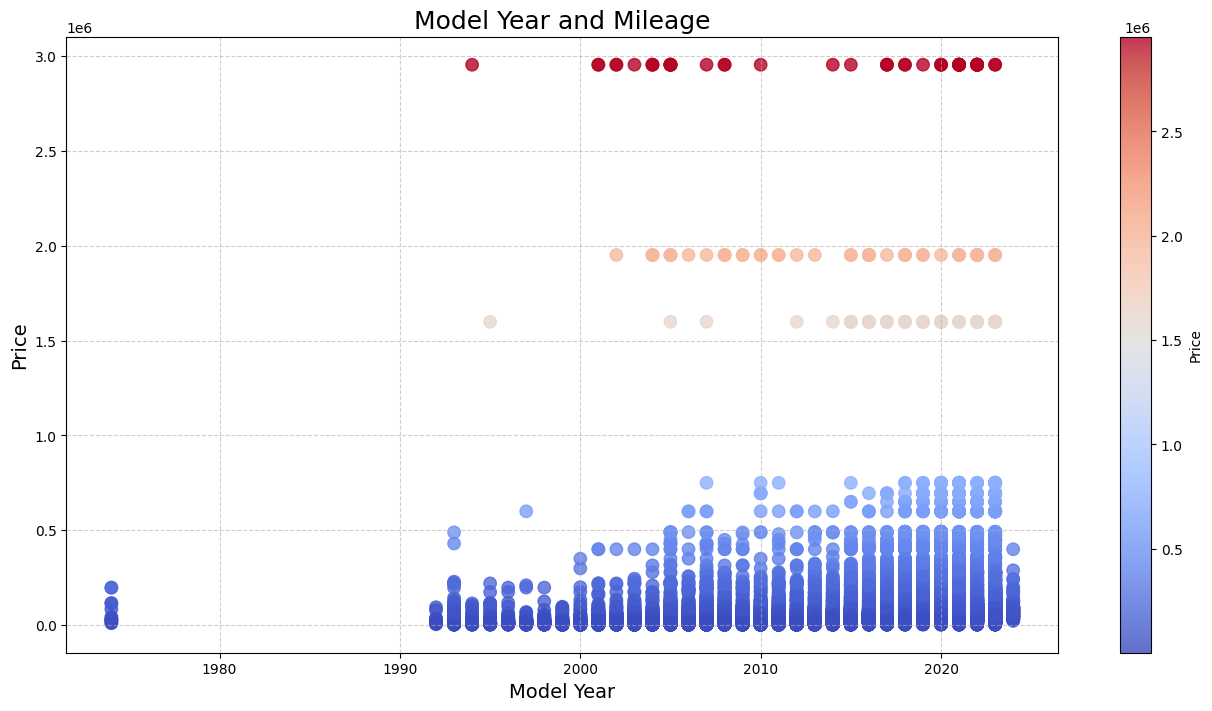

In [14]:
fig = plt.figure(figsize=(16,8))
plt.scatter(train['model_year'], train['price'], cmap='coolwarm', c=train['price'], s=80, alpha=0.8)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.colorbar(label='Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Model Year and Mileage', size=18)
plt.show()

**Since the price of cars somewhat vary based on model_year, we will categorize them for now and encode later **

In [15]:
model_year_quartiles = train['model_year'].quantile([0.25, 0.5, 0.75])

def categorize_model_year(year):
    if year <= model_year_quartiles[0.25]:
        return 'vintage'
    elif year <= model_year_quartiles[0.5]:
        return 'very old'
    elif year <= model_year_quartiles[0.75]:
        return 'old'
    else:
        return 'almost new'

train['model_year'] = train['model_year'].apply(categorize_model_year)

train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,peasant,Cooper S Base,vintage,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,economy,LS V8,vintage,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,economy,Silverado 2500 LT,vintage,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,luxury,G90 5.0 Ultimate,very old,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,luxury,Metris Base,almost new,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


Text(0, 0.5, 'Average Price')

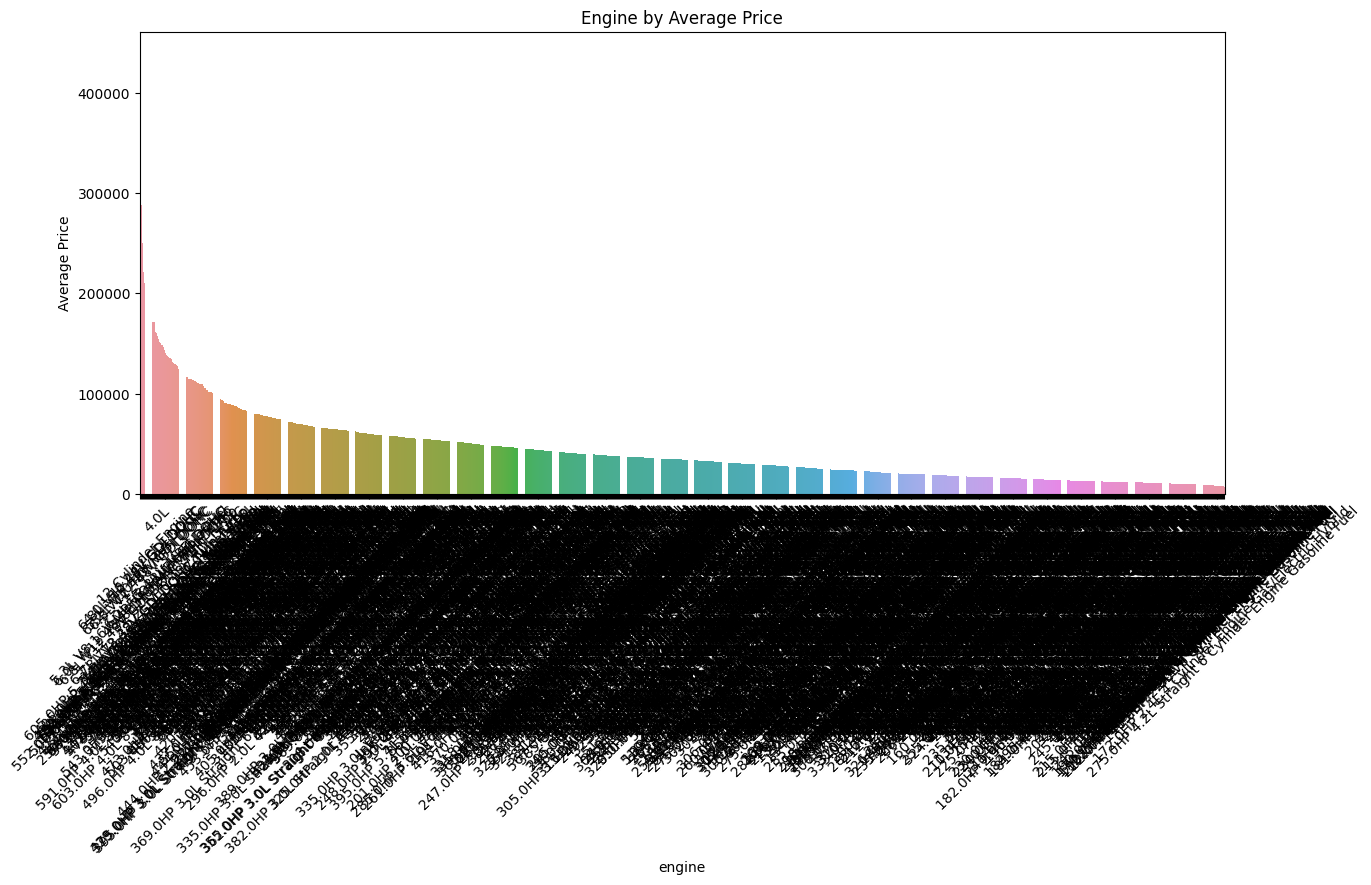

In [16]:
plt.figure(figsize=(14, 6))
avg_price_by_fuel = train.groupby('engine')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_fuel.index, y=avg_price_by_fuel.values)
plt.title('Engine by Average Price')
plt.xticks(rotation=45)
plt.xlabel('engine')
plt.ylabel('Average Price')

**Since the how many liters the engine is represents the engine power the best and the price also varies based on engine power, let's extract the #.#L value as float data type**

In [17]:
train['engine'] = train['engine'].str.extract(r'(\d+\.\d+)L')[0].astype(float)

train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,peasant,Cooper S Base,vintage,213000,Gasoline,1.6,A/T,Yellow,Gray,None reported,Yes,4200
1,1,economy,LS V8,vintage,143250,Gasoline,3.9,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,economy,Silverado 2500 LT,vintage,136731,E85 Flex Fuel,5.3,A/T,Blue,Gray,None reported,Yes,13900
3,3,luxury,G90 5.0 Ultimate,very old,19500,Gasoline,5.0,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,luxury,Metris Base,almost new,7388,Gasoline,2.0,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [18]:
test['engine'] = test['engine'].str.extract(r'(\d+\.\d+)L')[0].astype(float)

test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,luxury,Rover LR2 Base,2015,98000,Gasoline,2.0,6-Speed A/T,White,Beige,None reported,Yes
1,188534,luxury,Rover Defender SE,2020,9142,Hybrid,3.0,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,economy,Expedition Limited,2022,28121,Gasoline,3.5,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,economy,A6 2.0T Sport,2016,61258,Gasoline,NaN,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,economy,A6 2.0T Premium Plus,2018,59000,Gasoline,2.0,A/T,Gray,Black,None reported,Yes


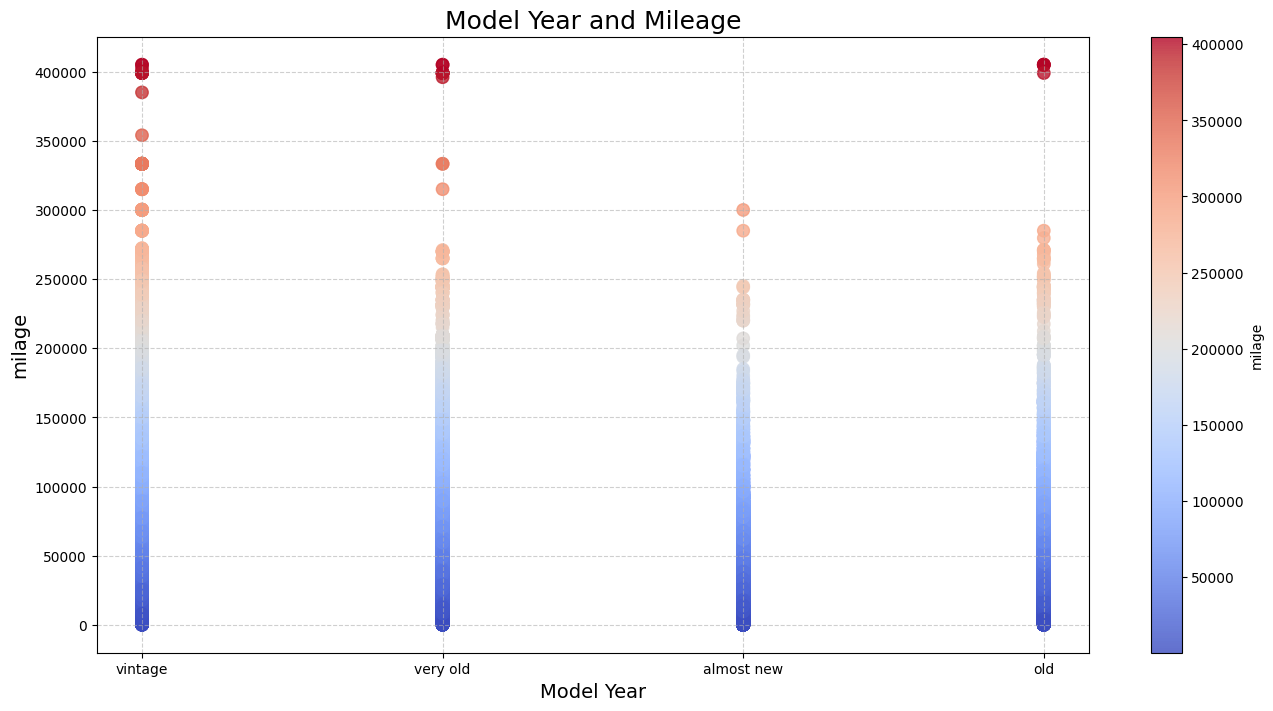

In [19]:
fig = plt.figure(figsize=(16,8))
plt.scatter(train['model_year'], train['milage'], cmap='coolwarm', c=train['milage'], s=80, alpha=0.8)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('milage', fontsize=14)
plt.colorbar(label='milage')
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Model Year and Mileage', size=18)
plt.show()

In [20]:
scaler = StandardScaler()

scaled_milage = scaler.fit_transform(train[['milage']])
train['milage'] = scaled_milage
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,peasant,Cooper S Base,vintage,2.957842,Gasoline,1.6,A/T,Yellow,Gray,None reported,Yes,4200
1,1,economy,LS V8,vintage,1.557184,Gasoline,3.9,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,economy,Silverado 2500 LT,vintage,1.426276,E85 Flex Fuel,5.3,A/T,Blue,Gray,None reported,Yes,13900
3,3,luxury,G90 5.0 Ultimate,very old,-0.927854,Gasoline,5.0,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,luxury,Metris Base,almost new,-1.171076,Gasoline,2.0,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [21]:
scaled_milage_test = scaler.fit_transform(test[['milage']])
test['milage'] = scaled_milage_test

train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,peasant,Cooper S Base,vintage,2.957842,Gasoline,1.6,A/T,Yellow,Gray,None reported,Yes,4200
1,1,economy,LS V8,vintage,1.557184,Gasoline,3.9,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,economy,Silverado 2500 LT,vintage,1.426276,E85 Flex Fuel,5.3,A/T,Blue,Gray,None reported,Yes,13900
3,3,luxury,G90 5.0 Ultimate,very old,-0.927854,Gasoline,5.0,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,luxury,Metris Base,almost new,-1.171076,Gasoline,2.0,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [22]:
for column in train.columns:
    if column != 'price':
        unique_values = train[column].unique()
        print('Unique values in', column, ':', unique_values)

Unique values in id : [     0      1      2 ... 188530 188531 188532]
Unique values in brand : ['peasant' 'economy' 'luxury']
Unique values in model : ['Cooper S Base' 'LS V8' 'Silverado 2500 LT' ... 'e-Golf SE'
 'Integra w/A-Spec Tech Package' 'IONIQ Plug-In Hybrid SEL']
Unique values in model_year : ['vintage' 'very old' 'almost new' 'old']
Unique values in milage : [ 2.95784224  1.55718431  1.42627551 ... -1.22463278 -1.26075871
  1.38354289]
Unique values in fuel_type : ['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
Unique values in engine : [1.6  3.9  5.3  5.   2.   3.   2.7  3.6   nan 6.2  4.4  4.   4.6  5.2
 3.7  5.7  6.7  3.5  2.8  5.5  5.4  6.8  3.8  2.5  3.4  2.4  3.3  2.3
 3.2  4.7  1.8  6.   4.8  5.6  4.3  4.2  1.5  6.4  8.3  6.3  2.1  1.4
 4.5  1.3  2.9  1.7  6.6  2.2  6.1  7.3  6.5  0.65 6.75 7.   1.   5.9
 8.1  5.8  1.2  8.4  8.   7.4 ]
Unique values in transmission : ['A/T' 'Transmission w/Dual Shift Mode' '7-Speed A/T' '8-Speed

**Now, Encoding the the categories that we had made earlier**

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train['brand'] = label_encoder.fit_transform(train['brand'])
train['model_year'] = label_encoder.fit_transform(train['model_year'])
train['fuel_type'] = label_encoder.fit_transform(train['fuel_type'])
train['accident'] = label_encoder.fit_transform(train['accident'])



In [24]:
test['brand'] = label_encoder.fit_transform(test['brand'])
test['model_year'] = label_encoder.fit_transform(test['model_year'])
test['fuel_type'] = label_encoder.fit_transform(test['fuel_type'])
test['accident'] = label_encoder.fit_transform(test['accident'])

In [25]:
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,1,Rover LR2 Base,26,0.636302,2,2.0,6-Speed A/T,White,Beige,1,Yes
1,188534,1,Rover Defender SE,31,-1.132944,3,3.0,8-Speed A/T,Silver,Black,1,Yes
2,188535,0,Expedition Limited,33,-0.755054,2,3.5,10-Speed Automatic,White,Ebony,1,NaN
3,188536,0,A6 2.0T Sport,27,-0.095265,2,NaN,Automatic,Silician Yellow,Black,1,NaN
4,188537,0,A6 2.0T Premium Plus,29,-0.140224,2,2.0,A/T,Gray,Black,1,Yes


In [26]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,2,Cooper S Base,3,2.957842,2,1.6,A/T,Yellow,Gray,1,Yes,4200
1,1,0,LS V8,3,1.557184,2,3.9,A/T,Silver,Beige,0,Yes,4999
2,2,0,Silverado 2500 LT,3,1.426276,1,5.3,A/T,Blue,Gray,1,Yes,13900
3,3,1,G90 5.0 Ultimate,2,-0.927854,2,5.0,Transmission w/Dual Shift Mode,Black,Black,1,Yes,45000
4,4,1,Metris Base,0,-1.171076,2,2.0,7-Speed A/T,Black,Beige,1,Yes,97500


In [27]:
train_new = train.drop(['id', 'model', 'transmission', 'ext_col', 'int_col', 'clean_title'], axis=1, errors='ignore')
train_new = train_new.apply(lambda x: x.fillna(x.mode()[0]))
print(train_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   brand       188533 non-null  int64  
 1   model_year  188533 non-null  int64  
 2   milage      188533 non-null  float64
 3   fuel_type   188533 non-null  int64  
 4   engine      188533 non-null  float64
 5   accident    188533 non-null  int64  
 6   price       188533 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 10.1 MB
None


In [28]:
test_new = test.drop(['id', 'model', 'transmission', 'ext_col', 'int_col', 'clean_title'], axis=1, errors='ignore')
test_new = test_new.apply(lambda x: x.fillna(x.mode()[0]))
print(test_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   brand       125690 non-null  int64  
 1   model_year  125690 non-null  int64  
 2   milage      125690 non-null  float64
 3   fuel_type   125690 non-null  int64  
 4   engine      125690 non-null  float64
 5   accident    125690 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 5.8 MB
None


In [29]:
train_new.dtypes

brand           int64
model_year      int64
milage        float64
fuel_type       int64
engine        float64
accident        int64
price           int64
dtype: object

In [30]:
train_new['price'] = np.log10(train_new['price'])


In [31]:
y = train_new.pop('price')
x = train_new
x_test_dataset = test_new

In [32]:
def model_report(estimator, x, y, cv=3,valid=True):
    print("="*80)
    print(f"    Model: {estimator.__class__.__name__}")
    print("="*80)
    
  
    X_train, X_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.2,  random_state=42)
    X_test, X_valid, y_test, y_valid = train_test_split(X_test1,y_test1, test_size=0.2, random_state=42)
    if valid:
        estimator.fit(
        X_train.values, y_train.values,
        eval_set=[(X_valid.values, y_valid.values)],
    )
    else:
        estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score : {r2.mean():.6f}") 
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Root Mean Squared Error (RMSE) : {rmse.mean():.6f}")
    pred = estimator.predict(x_test_dataset)
    return pred

In [33]:
lgb_params= {
        'n_epochs': 10000, 
        'learning_rate': 0.01,
        'colsample_bytree': 0.55,
        'bagging_fraction': 0.8,
        'num_leaves': 3072,
        'min_child_samples': 12,
        'reg_lambda': 64, # not 128
        'max_bin': 255,
        'max_depth': 10,
        'reg_alpha': 0,
        'early_stopping': 200,
        'verbose': -1,
    }

In [34]:
model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
y_pred = model_report(model, x, y,valid=False)

    Model: LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 150826, number of used features: 6
[LightGBM] [Info] Start training from score 4.469539
R2 Score : 0.628412
Root Mean Squared Error (RMSE) : 0.223938


In [35]:
lgb_reg = LGBMRegressor(**lgb_params,loss_function='RMSE',verbosity=-1)
lgb_pred = model_report(lgb_reg, x, y)

    Model: LGBMRegressor
R2 Score : 0.481129
Root Mean Squared Error (RMSE) : 0.264623


In [36]:
y_pred = lgb_reg.predict(x_test_dataset)

In [37]:
y_pred

array([4.2957217 , 4.53886452, 4.46685655, ..., 4.37751576, 4.28625953,
       4.39265796])

In [38]:
y_pred_prices = 10 ** y_pred
y_pred_prices

array([19757.03175891, 34583.14763535, 29299.25344701, ...,
       23851.50373166, 19331.23196236, 24697.78247441])

In [39]:
x_test_dataset

,brand,model_year,milage,fuel_type,engine,accident
0,1,26,0.636302,2,2.0,1
1,1,31,-1.132944,3,3.0,1
2,0,33,-0.755054,2,3.5,1
3,0,27,-0.095265,2,3.0,1
4,0,29,-0.140224,2,2.0,1
...,...,...,...,...,...,...
125685,1,25,0.343910,2,3.0,1
125686,0,30,-0.730862,2,3.0,1
125687,0,23,0.230796,2,3.0,1
125688,0,23,0.915055,2,3.0,1


In [40]:
x_test_dataset['id'] = test['id']

In [41]:
submission = pd.DataFrame({
    'id': x_test_dataset['id'],
    'prediction': y_pred_prices
})
submission.to_csv('submission.csv', index=False)
